<a href="https://colab.research.google.com/github/vsemwal/human-walking-activities/blob/master/Different_Speed_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:





import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv1D, MaxPooling1D
from keras.utils import np_utils
from keras import regularizers

Using TensorFlow backend.


In [0]:
sns.set()
plt.style.use('ggplot')

In [0]:
data = pd.read_csv("1,3,5,7mphnorwal walk.csv")

In [0]:
data.head(10)

,jointType,depthX,depthY,colorX,colorY,cameraX,cameraY,cameraZ,orientationX,orientationY,orientationZ,orientationW,time,activity,sid
0,0,0.632764,0.585317,0.607712,0.602342,0.389040,-0.249903,2.184664,-0.013381,0.982128,0.065891,-0.175798,67.0,1.0,0.0
1,1,0.629250,0.431639,0.603402,0.427327,0.387807,0.142325,2.237754,0.002097,0.996260,0.067203,0.054268,67.0,1.0,0.0
2,2,0.627228,0.289618,0.600105,0.266107,0.387825,0.519097,2.281877,0.014851,0.955451,0.044675,0.291370,67.0,1.0,0.0
3,3,0.652865,0.267710,0.619328,0.240958,0.480619,0.590595,2.339035,0.000000,0.000000,0.000000,0.000000,67.0,1.0,0.0
4,4,0.599162,0.327201,0.579418,0.309074,0.285866,0.402272,2.181561,0.732545,-0.582669,0.226117,-0.269716,67.0,1.0,0.0
5,5,0.607448,0.383479,0.588015,0.372856,0.278177,0.232619,1.948169,0.864103,0.096156,-0.217281,-0.443700,67.0,1.0,0.0
6,6,0.680003,0.382112,0.645399,0.370257,0.434405,0.215129,1.782735,0.705689,0.583907,-0.200805,-0.347467,67.0,1.0,0.0
7,7,0.689147,0.380264,0.652529,0.368030,0.454080,0.217461,1.771405,0.662416,0.691619,-0.100483,-0.269760,67.0,1.0,0.0
8,8,0.647253,0.325373,0.615782,0.306334,0.457578,0.430487,2.311362,0.658763,0.709686,0.205329,0.142185,67.0,1.0,0.0
9,9,0.594062,0.409911,0.574839,0.403139,0.304120,0.217628,2.449216,0.488150,0.066179,0.787886,0.369548,67.0,1.0,0.0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266783 entries, 0 to 2266782
Data columns (total 15 columns):
jointType       int64
depthX          float64
depthY          float64
colorX          float64
colorY          float64
cameraX         float64
cameraY         float64
cameraZ         float64
orientationX    float64
orientationY    float64
orientationZ    float64
orientationW    float64
time            float64
activity        float64
sid             float64
dtypes: float64(14), int64(1)
memory usage: 259.4 MB


[]

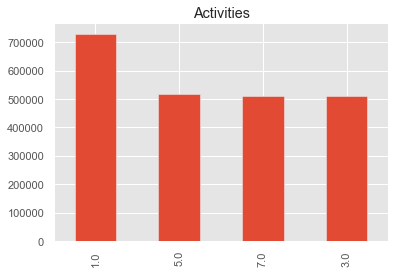

In [0]:
data['activity'].value_counts().plot(kind = 'bar', title = "Activities")
plt.plot()

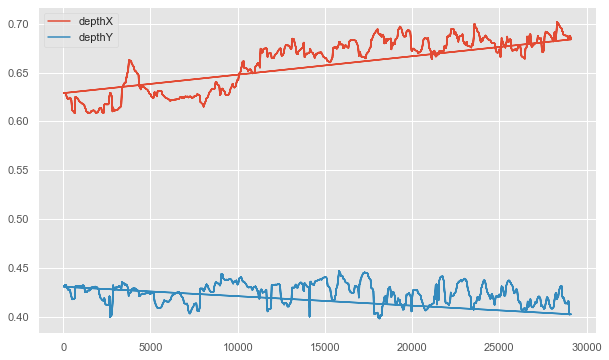

In [0]:
plt.figure(figsize = (10, 6))
plt.plot(data[(data['sid'] == 0.0) & (data['activity'] == 1.0) & (data['jointType'] == 1)]['time'], data[(data['sid'] == 0.0) & (data['activity'] == 1.0) & (data['jointType'] == 1)]['depthX'])
plt.plot(data[(data['sid'] == 0.0) & (data['activity'] == 1.0) & (data['jointType'] == 1)]['time'], data[(data['sid'] == 0.0) & (data['activity'] == 1.0) & (data['jointType'] == 1)]['depthY'])
# plt.plot(data[(data['sid'] == 0.0) & (data['activity'] == 1.0) & (data['jointType'] == 0)]['time'], data[(data['sid'] == 0.0) & (data['activity'] == 1.0) & (data['jointType'] == 0)]['orientationZ'])
# plt.plot(data[(data['sid'] == 0.0) & (data['activity'] == 1.0) & (data['jointType'] == 0)]['time'], data[(data['sid'] == 0.0) & (data['activity'] == 1.0) & (data['jointType'] == 0)]['orientationW'])
plt.legend(['depthX', 'depthY'])#, 'orientationZ', 'orientationW'])

In [0]:
data.columns

Index(['jointType', 'depthX', 'depthY', 'colorX', 'colorY', 'cameraX',
       'cameraY', 'cameraZ', 'orientationX', 'orientationY', 'orientationZ',
       'orientationW', 'time', 'activity', 'sid'],
      dtype='object')

In [0]:
col = ['jointType', 'depthX', 'depthY', 'time', 'activity', 'sid']
use_data = data[col].copy()
use_data['activity'] = use_data['activity'].map({1:0, 3:1, 5:2, 7:3})
use_data.head()

,jointType,depthX,depthY,time,activity,sid
0,0,0.632764,0.585317,67.0,0.0,0.0
1,1,0.629250,0.431639,67.0,0.0,0.0
2,2,0.627228,0.289618,67.0,0.0,0.0
3,3,0.652865,0.267710,67.0,0.0,0.0
4,4,0.599162,0.327201,67.0,0.0,0.0


In [0]:
use_data = use_data.groupby(['jointType', 'activity', 'sid', 'time'], as_index = False)[['depthX', 'depthY']].mean()

In [0]:
use_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959575 entries, 0 to 959574
Data columns (total 6 columns):
jointType    959575 non-null int64
activity     959575 non-null float64
sid          959575 non-null float64
time         959575 non-null float64
depthX       959575 non-null float64
depthY       959575 non-null float64
dtypes: float64(5), int64(1)
memory usage: 51.2 MB


In [0]:
use_data.head(10)

,jointType,activity,sid,time,depthX,depthY
0,0,0.0,0.0,30.0,0.632791,0.584554
1,0,0.0,0.0,67.0,0.632764,0.585317
2,0,0.0,0.0,103.0,0.631359,0.586576
3,0,0.0,0.0,145.0,0.628691,0.587546
4,0,0.0,0.0,183.0,0.620062,0.587712
5,0,0.0,0.0,222.0,0.614487,0.582819
6,0,0.0,0.0,257.0,0.613724,0.581864
7,0,0.0,0.0,294.0,0.612480,0.580207
8,0,0.0,0.0,329.0,0.613446,0.584220
9,0,0.0,0.0,365.0,0.615885,0.582352


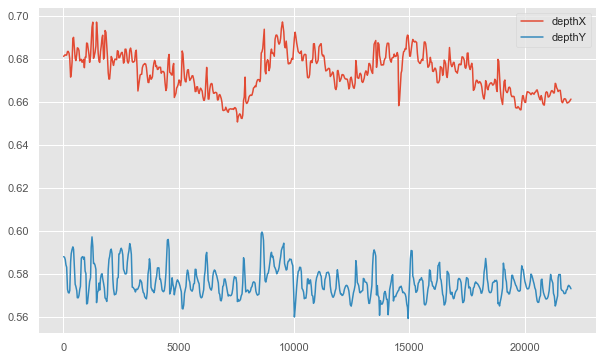

In [0]:
plt.figure(figsize = (10, 6))
plt.plot(use_data[(use_data['jointType'] == 0) & (use_data['activity'] == 3) & (use_data['sid'] == 0)]['time'], use_data[(use_data['jointType'] == 0) & (use_data['activity'] == 3) & (use_data['sid'] == 0)]['depthX'])
plt.plot(use_data[(use_data['jointType'] == 0) & (use_data['activity'] == 3) & (use_data['sid'] == 0)]['time'], use_data[(use_data['jointType'] == 0) & (use_data['activity'] == 3) & (use_data['sid'] == 0)]['depthY'])
plt.legend(['depthX', 'depthY'])

In [0]:
train_data = use_data[use_data['sid'] <= 10]
test_data = use_data[use_data['sid'] > 10]

In [0]:
def create_segments_and_labels(df, time_steps, steps):
    n_features = 3
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, steps):
        x = df['jointType'].values[i: i + time_steps]
        y = df['depthX'].values[i: i + time_steps]
        z = df['depthY'].values[i: i + time_steps]

        label = stats.mode(df['activity'][i: i + time_steps])[0][0]
        segments.append([x, y, z])
        labels.append(label)
    reshaped_segments = np.asarray(segments, dtype = np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    
    return reshaped_segments, labels

In [0]:
X_train, Y_train = create_segments_and_labels(train_data, 80, 80)

In [0]:
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], 'training samples')
print('Y_train shape: ', Y_train.shape)

X_train shape:  (8213, 80, 3)
8213 training samples
Y_train shape:  (8213,)


In [0]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]
print("n_timesteps: ", n_timesteps)
print("n_features: ", n_features)

n_timesteps:  80
n_features:  3


In [0]:
Y_train = np_utils.to_categorical(Y_train, 4)

In [0]:
print("Y_train shape: ", Y_train.shape)

Y_train shape:  (8213, 4)


In [0]:
n_outputs = Y_train.shape[1]

In [0]:
model = Sequential()
model.add(Conv1D(filters = 128, kernel_size = 5, activation = 'relu', input_shape = (n_timesteps, n_features)))
model.add(Conv1D(filters = 128, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling1D(pool_size = 3))
model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(n_outputs, activation = 'softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 76, 128)           2048      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 72, 128)           82048     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 24, 128)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dense_5 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_6 (Dense)              (None, 4)                

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
8213/8213 [==============================] - 32s 4ms/step - loss: 1.4063 - accuracy: 0.2563
Epoch 2/10
8213/8213 [==============================] - 31s 4ms/step - loss: 1.3862 - accuracy: 0.2579
Epoch 3/10
8213/8213 [==============================] - 31s 4ms/step - loss: 1.3863 - accuracy: 0.2541
Epoch 4/10
8213/8213 [==============================] - 30s 4ms/step - loss: 1.3862 - accuracy: 0.2589
Epoch 5/10
8213/8213 [==============================] - 30s 4ms/step - loss: 1.3863 - accuracy: 0.2589
Epoch 6/10
8213/8213 [==============================] - 30s 4ms/step - loss: 1.3862 - accuracy: 0.2589
Epoch 7/10
8213/8213 [==============================] - 30s 4ms/step - loss: 1.3863 - accuracy: 0.2589
Epoch 8/10
8213/8213 [==============================] - 30s 4ms/step - loss: 1.3863 - accuracy: 0.2589
Epoch 9/10
8213/8213 [==============================] - 30s 4ms/step - loss: 1.3862 - accuracy: 0.2589
Epoch 10/10
8213/8213 [==============================] - 30s 4ms/step - l